## ディープラーニングのモデルを作ってみよう！～回帰モデル

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tensorflow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# MSE
from sklearn.metrics import mean_squared_error

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
# CSVファイルを読み込む
dataset_base = pd.read_csv("./baseball_salary_preprocessed.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [3]:
# 列の抜き出し
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

# 列名をリネームする
dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', '年数': 'years_exp', \
    '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})

dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


In [4]:
# MinMaxScalerで正規化を実施
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset_std = sc.fit_transform(dataset)
dataset_std.shape

(241, 6)

In [5]:
# 目的変数Y:dataset_stdの0列
Y = dataset_std[:, 0]

# 特徴量X:datastd_stdの1列目以降
X = dataset_std[:, 1:]
print("Y:", Y.shape)
print("X:", X.shape)

Y: (241,)
X: (241, 5)


In [6]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [7]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 5)
Y_valid= (51,) , X_valid= (51, 5)
Y_test= (73,) , X_test= (73, 5)


In [8]:
import tensorflow as tf

# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(8, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(8, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(1)
])

# モデルの構築
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])

In [9]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=1000, batch_size=48, verbose=True,
         validation_data=(X_valid, Y_valid))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.1267 - mae: 0.2652 - val_loss: 0.1192 - val_mae: 0.2240
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1050 - mae: 0.2281 - val_loss: 0.1051 - val_mae: 0.1978
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0755 - mae: 0.1821 - val_loss: 0.0935 - val_mae: 0.1744
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0752 - mae: 0.1783 - val_loss: 0.0857 - val_mae: 0.1597
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0644 - mae: 0.1558 - val_loss: 0.0786 - val_mae: 0.1494
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0491 - mae: 0.1312 - val_loss: 0.0723 - val_mae: 0.1410
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0490 - mae: 0.1317 - val_loss: 0.0677 - val_mae: 0.1365
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0427 - mae: 0.1233 - val_loss: 0.0633 - val_mae: 0.1320
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.048

Text(0, 0.5, 'MSE')

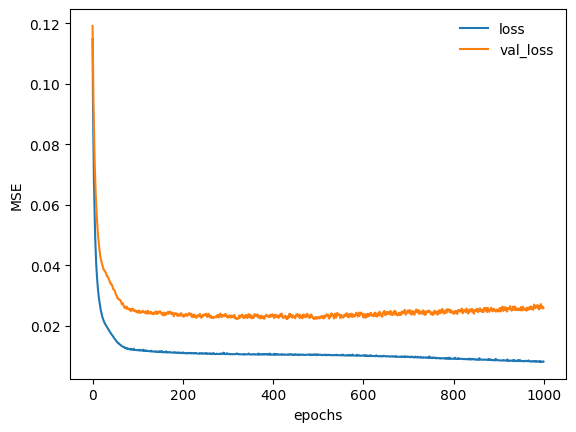

In [11]:
# MSEをグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("MSE")

In [12]:
# モデルを作り直す
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(8, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(8, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])

# EarlyStoppingを入れて学習を実施
log = model.fit(X_train, Y_train, epochs=1000, batch_size=48, verbose=False,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 287: early stopping


Text(0, 0.5, 'MSE')

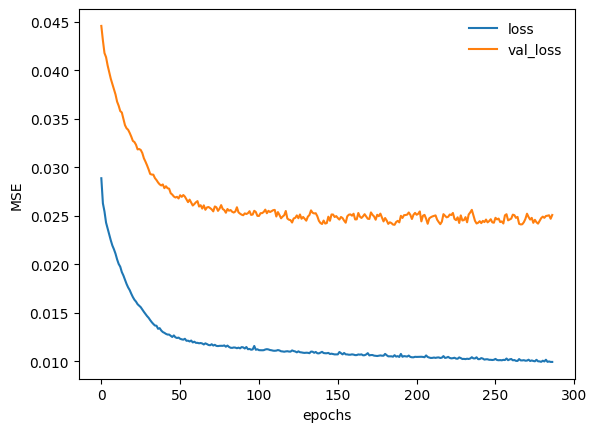

In [13]:
# 改めてMSEをグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("MSE")

In [14]:
# テストデータによる予測。予測はpredictを使う
Y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [15]:
# 正規化した値を元に戻すにはinverse_transformを使う
# 行列の形はdatasetと一致している必要があるため、XとYを結合させる
Y_test_ = sc.inverse_transform(np.hstack([Y_test.reshape(len(Y_test), 1), X_test]))[:, 0]
Y_pred_ = sc.inverse_transform(np.hstack([Y_pred.reshape(len(Y_pred), 1), X_test]))[:, 0]

In [16]:
# MSE(平均2乗誤差)を算出
mse = mean_squared_error(Y_test_, Y_pred_)
print('MSE(Keras回帰モデル):', mse)

MSE(Keras回帰モデル): 31479850.904885344


Text(0, 0.5, 'prediction')

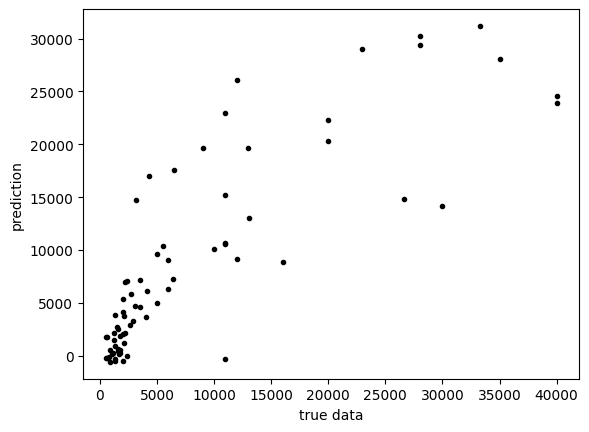

In [17]:
# 予測値と正解の散布図の表示
plt.plot(Y_test_, Y_pred_, 'k.')
plt.xlabel("true data")
plt.ylabel("prediction")